In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import models, layers


In [19]:
df = pd.read_csv('./datasets/alphabets_28x28.csv')
df.query('label != "This"', inplace=True)
df.dropna(axis=0, how='any')
df.shape


C:\Users\amogh\AppData\Local\Temp\ipykernel_22384\2912942691.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/alphabets_28x28.csv')


(371391, 785)

In [22]:

from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(np.array(df.iloc[:, 1:]).astype(np.float32), pd.get_dummies(df.iloc[: , :1]), random_state=104,test_size=.25,shuffle=True )


In [23]:
X_train = X_train.reshape((278543, 28, 28, 1))

In [24]:
X_test= X_test.reshape((92848,28,28, 1))

In [25]:

model = models.Sequential()
model.add(layers.Conv2D(28, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(28, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(26, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

model.fit(X_train, y_train, epochs = 5)


C:\Users\amogh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
8705/8705 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8817 - loss: 0.6780
Epoch 2/5
8705/8705 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9700 - loss: 0.1095
Epoch 3/5
8705/8705 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9751 - loss: 0.0913
Epoch 4/5
8705/8705 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9769 - loss: 0.0824
Epoch 5/5
8705/8705 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9783 - loss: 0.0783


In [38]:
model.evaluate(X_test, y_test)


2902/2902 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9731 - loss: 0.1115


[0.10989760607481003, 0.9733973741531372]

In [41]:
model.save('./models/OCR.keras')

(336, 280)

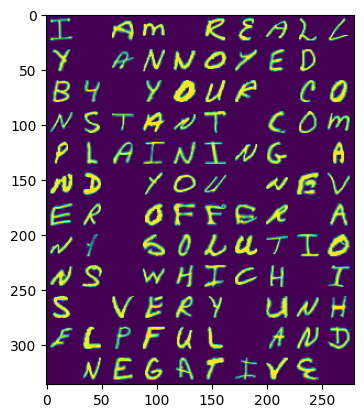

In [51]:
plt.imshow(image1gray)
image1gray.shape

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

image1 = cv2.imread('./datasets/target_images/line_6.png')
image1gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

outputstring = ''

        

In [ ]:
outputs = []

In [82]:
dic = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
x, y = image1gray.shape
i = 0
while (i < x ):
    j = 0
    while (j<y):
        window = image1gray[i:i+28, j:j+28]
        if (window.shape==0):
            break
        window = window.reshape((1, 28,28,1))
        print(i, j)
        if window.sum() == 0:
            outputstring = outputstring + ' '
        else:
            outputstring = outputstring + dic[np.argmax(model.predict(window))]
        j=j+28
    i=i+28

print(outputstring)

0 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0 56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0 84
0 112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0 168
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0 196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0 224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0 252
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
28 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
28 28
28 56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
28 84
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
28 112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
28 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
28 168
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
28 196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
28 224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
28 252
56 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
56 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
56 56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
56 84
56 112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
56 140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
56 168


In [83]:
print(outputstring)


THE MESTING MINUTES YOU PREPARED WORE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE        


In [84]:

outputs.append(outputstring)

In [85]:
print(outputs)

['I AM REALLY ANNOYED BY YOUR CONSTANT COMPLAINING AND YOU NBVER OFFER ANY SOLUTIONS WHICH IS VERY UNHELPFUL AND NEGATIVE ', 'IT IS FRUSTRATIAG THAT YOU NEVER PAY ATTENTION DURING DSSCUSSIONS AND YOUR LACX OF FOCUS IS REALLY AFFECTING OUR PROGRESS         ', 'I AM DELIGHTED BY GOUR FRIENDLINESS AND YOU ALWAYS MAKE EVERYONE FEEL WELCOME WHICH FOSTERS A SENSE OF COMMUNITY        ', 'IT JS WONDERFUL THAT YOU ALWAYS SHOW KINDNESS ANO YOUR EMPATHY TOWARDS OTHERS IS TRULY HEARTWARMINT AND APPRECIATED     ', 'YOUR ANALYSIS OF THE DATA WAS ACCURATE AND WELL TRESENTED PROVIDING A CLEAR UNDERSTANBING OF THE TRENDS AND PATTERNS    ', 'THE MESTING MINUTES YOU PREPARED WORE DETAILED AND WELL ORGANIZED ACCURATELY REFLECTING THE DISCUSSIONS AND DECISIONS MADE        ']


In [87]:
outputdf = pd.DataFrame(outputs)

In [89]:
outputdf.to_csv('OCRoutputs.csv')

In [8]:
import pandas as pd
import numpy as np

angry = []
happy = []
neutral = []
sentimenttraindf = pd.read_csv('./datasets/sentiment_analysis_dataset.csv')
sentimenttraindf.head

<bound method NDFrame.head of                                                  line sentiment
0   I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY ...     Angry
1   IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSI...     Angry
2   I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE A...     Angry
3   IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETING...     Angry
4   I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHIN...     Angry
5   IT UPSETS ME THAT YOU ALWAYS ARRIVE LATE AND Y...     Angry
6   I AM REALLY ANGRY BECAUSE YOU NEVER PREPARE FO...     Angry
7   IT INFURIATES ME THAT YOU NEVER APPRECIATE THE...     Angry
8   I CANNOT STAND HOW YOU ALWAYS TALK DOWN TO PEO...     Angry
9   IT IS VERY DISAPPOINTING THAT YOU NEVER FOLLOW...     Angry
10  I AM VERY HAPPY BECAUSE YOU ALWAYS LISTEN CARE...     Happy
11  IT IS WONDERFUL HOW YOU ALWAYS COME PREPARED A...     Happy
12  I APPRECIATE HOW YOU ALWAYS OFFER TO HELP AND ...     Happy
13  IT IS FANTASTIC THAT YOU ALWAYS HAVE A POSITIV...     Happy
14  I AM G

In [9]:
for index, row in sentimenttraindf.iterrows():
    if(index <10):
        res = row['line'].split()
        for i in range(len(res)):
            angry.append(res[i])
    if(index <20 and index > 9):
        res = row['line'].split()
        for i in range(len(res)):
            happy.append(res[i])
    if(index <30 and index >19):
        res = row['line'].split()
        for i in range(len(res)):
            neutral.append(res[i])



In [18]:
unique = []
for i in range(len(angry)):
    if angry[i] in unique:
        z=0
    else:
        unique.append(angry[i])

In [20]:
for i in range(len(neutral)):
    if neutral[i] in unique:
        z=0
    else:
        unique.append(neutral[i])

for i in range(len(happy)):
    if happy[i] in unique:
        z=0
    else:
        unique.append(happy[i])

In [13]:
print(angry)
print(happy)
print(neutral)

['I', 'AM', 'REALLY', 'FRUSTRATED', 'BECAUSE', 'YOU', 'CONSTANTLY', 'IGNORE', 'MY', 'MESSAGES', 'AND', 'YOU', 'NEVER', 'RESPOND', 'ON', 'TIME', 'WHICH', 'MAKES', 'IT', 'VERY', 'HARD', 'TO', 'GET', 'ANYTHING', 'DONE', 'IT', 'MAKES', 'ME', 'UPSET', 'THAT', 'YOU', 'NEVER', 'TAKE', 'RESPONSIBILITY', 'FOR', 'YOUR', 'ACTIONS', 'AND', 'YOU', 'ALWAYS', 'BLAME', 'OTHERS', 'WHEN', 'THINGS', 'GO', 'WRONG', 'WORSENING', 'THE', 'SITUATION', 'I', 'CANNOT', 'BELIEVE', 'YOU', 'MISSED', 'ANOTHER', 'DEADLINE', 'AND', 'YOUR', 'LACK', 'OF', 'ATTENTION', 'TO', 'DETAIL', 'IS', 'CAUSING', 'MAJOR', 'PROBLEMS', 'FOR', 'THE', 'ENTIRE', 'TEAM', 'WHICH', 'IS', 'UNACCEPTABLE', 'IT', 'ANNOYS', 'ME', 'WHEN', 'YOU', 'INTERRUPT', 'DURING', 'MEETINGS', 'AND', 'YOU', 'NEVER', 'LET', 'ANYONE', 'FINISH', 'THEIR', 'THOUGHTS', 'DISRUPTING', 'THE', 'WHOLE', 'CONVERSATION', 'I', 'AM', 'TIRED', 'OF', 'YOUR', 'EXCUSES', 'EVERY', 'TIME', 'SOMETHING', 'GOES', 'WRONG', 'AND', 'YOU', 'NEVER', 'SEEM', 'TO', 'LEARN', 'FROM', 'YOUR', 

In [32]:
uniqueno = len(unique)
angryno = len(angry)
happyno = len(happy)
neutralno = len(neutral)

def get_sentiment(txt):
    probs = []
    inter = txt.split()
    prob = 1
    for i in range(len(inter)):
        if inter[i] in unique:
            counter = 0
            for j in range(len(angry)):
                if inter[i] == angry[j]:
                    counter+=1
            prob = prob*(counter +1)/(angryno + uniqueno)
    probs.append(prob)
    prob = 1
    for i in range(len(inter)):
        if inter[i] in unique:
            counter = 0
            for j in range(len(happy)):
                if inter[i] == happy[j]:
                    counter+=1
            prob = prob*(counter +1)/(happyno + uniqueno)
    probs.append(prob)
    prob = 1
    for i in range(len(inter)):
        if inter[i] in unique:
            counter = 0
            for j in range(len(neutral)):
                if inter[i] == neutral[j]:
                    counter+=1
            prob = prob*(counter +1)/(neutralno + uniqueno)
    probs.append(prob)

    idx = np.argmax(probs)
    if idx == 0:
        return 'Angry'
    if idx == 1:
        return 'Happy'
    if idx == 2:
        return 'Neutral'
    

            



In [39]:
ran = np.array(pd.read_csv('./OCRoutputs.csv'))
outputsentiments = []
for i in range(6):
    outputsentiments.append(get_sentiment(ran[i][1]))

In [40]:
print(outputsentiments)

['Happy', 'Angry', 'Happy', 'Happy', 'Neutral', 'Neutral']
